# Probability Integral Transform
If a continuous random variable X has a well-defined CDF, $F_x$. Take samples from X and plug into the CDF, guess what? They will follow a uniform distributions. This is denoted mathematically as:

$$
U = F_X(X) \sim \text{Uniform}(0,1)
$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import FancyArrowPatch
from matplotlib.animation import FuncAnimation

Below are the plots of the PDF and CDF of the exponential distribution

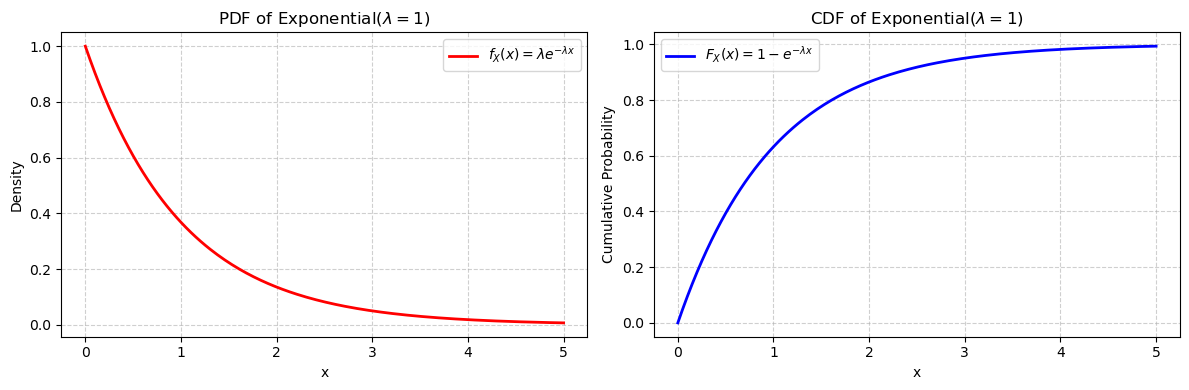

In [8]:
# Parameters
lam = 1.0   # rate λ
x = np.linspace(0, 5, 200)

# Exponential PDF and CDF
f_x = lam * np.exp(-lam * x)      # PDF
F_x = 1 - np.exp(-lam * x)        # CDF

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

# PDF
ax1.plot(x, f_x, color="red", lw=2, label=r"$f_X(x) = \lambda e^{-\lambda x}$")
ax1.set_title("PDF of Exponential($\lambda=1$)")
ax1.set_xlabel("x")
ax1.set_ylabel("Density")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.legend()

# CDF
ax2.plot(x, F_x, color="blue", lw=2, label=r"$F_X(x) = 1 - e^{-\lambda x}$")
ax2.set_title("CDF of Exponential($\lambda=1$)")
ax2.set_xlabel("x")
ax2.set_ylabel("Cumulative Probability")
ax2.grid(True, linestyle="--", alpha=0.6)
ax2.legend()

plt.tight_layout()
plt.show()


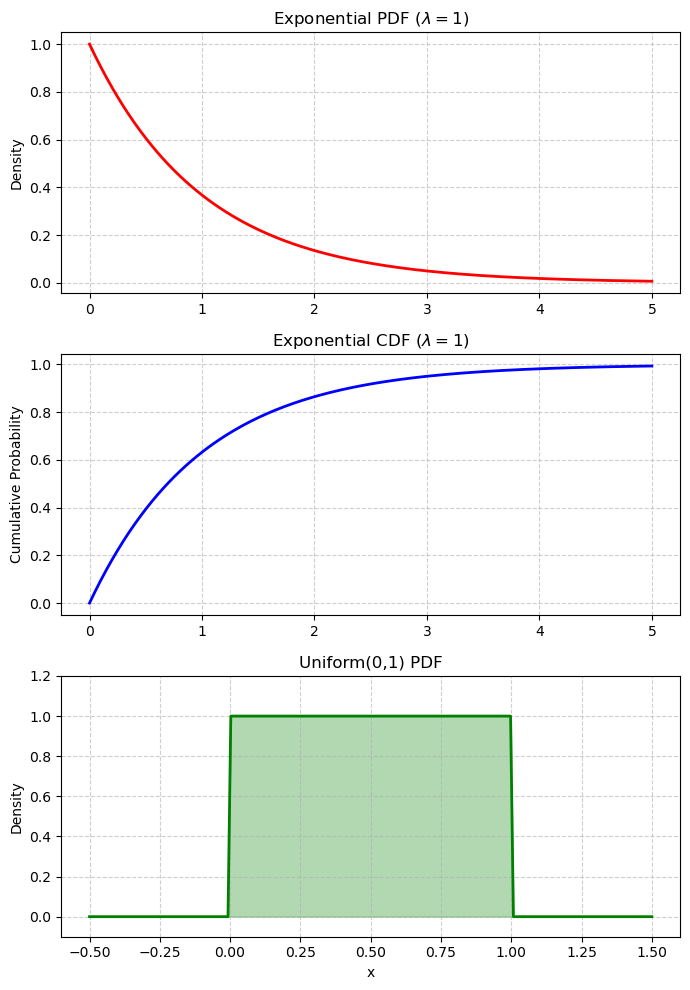

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lam = 1.0
x = np.linspace(0, 5, 200)

# Exponential PDF and CDF
f_x = lam * np.exp(-lam * x)
F_x = 1 - np.exp(-lam * x)

# Uniform(0,1) PDF
u = np.linspace(-0.5, 1.5, 200)
f_u = np.where((u >= 0) & (u <= 1), 1, 0)

# Create 3x1 subplot grid
fig, axes = plt.subplots(3, 1, figsize=(7,10))

# 1. Exponential PDF
axes[0].plot(x, f_x, color="red", lw=2)
axes[0].set_title("Exponential PDF ($\\lambda=1$)")
axes[0].set_ylabel("Density")
axes[0].grid(True, linestyle="--", alpha=0.6)

# 2. Exponential CDF
axes[1].plot(x, F_x, color="blue", lw=2)
axes[1].set_title("Exponential CDF ($\\lambda=1$)")
axes[1].set_ylabel("Cumulative Probability")
axes[1].grid(True, linestyle="--", alpha=0.6)

# 3. Uniform(0,1) PDF
axes[2].plot(u, f_u, color="green", lw=2)
axes[2].fill_between(u, f_u, alpha=0.3, color="green")
axes[2].set_title("Uniform(0,1) PDF")
axes[2].set_xlabel("x")
axes[2].set_ylabel("Density")
axes[2].set_ylim(-0.1, 1.2)
axes[2].grid(True, linestyle="--", alpha=0.6)

# --- Add dashed arrows between subplots ---
# Coordinates are in figure fraction (0..1, relative to whole canvas)
arrow1 = FancyArrowPatch((0.5, 0.78), (0.5, 0.62),
                         transform=fig.transFigure, 
                         arrowstyle="->", linestyle="--", 
                         mutation_scale=20, color="black")
arrow2 = FancyArrowPatch((0.5, 0.47), (0.5, 0.31),
                         transform=fig.transFigure, 
                         arrowstyle="->", linestyle="--", 
                         mutation_scale=20, color="black")

fig.patches.extend([arrow1, arrow2])

# Update function for animation
def update(frame):
    # Animate arrow1 growing downwards
    arrow1.set_positions((0.5, 0.78), (0.5, 0.78 - 0.16 * frame/50))
    # Animate arrow2 growing downwards
    arrow2.set_positions((0.5, 0.47), (0.5, 0.47 - 0.16 * frame/50))
    return arrow1, arrow2

ani = FuncAnimation(fig, update, frames=50, interval=100, blit=True)

plt.tight_layout()
plt.show()


In [32]:
X_samples_exp = np.random.exponential(size = 10000)

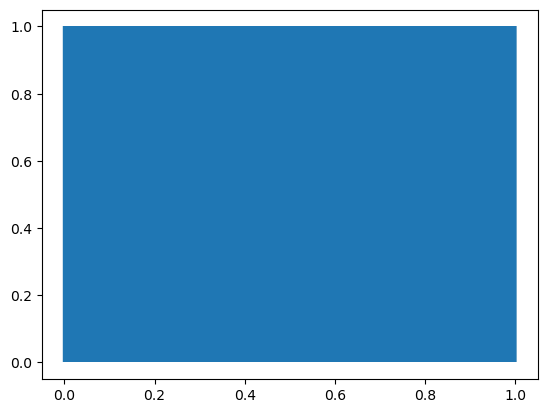

In [33]:
plt.vlines(1 - np.exp(-lam * X_samples_exp),0,1);